## Chapter 15: Calculus and automatic differentiation 

# 15.7 Higher order derivatives

In previous Sections we have seen how we can effeciently compute the derivative of generic functions, and because the derivative is a function itself is natural to ask - what happens if we take *its* derivative?  By the same logic we can compute it in the same manner, and for the same reasons it too is a generic function.  In turn we should then be able to compute the derivative of this function using the same tools, and so on ad infinitum.  

These 'derivatives of derivatives' are referred to commonly as *higher order derivatives*, and are the subject of this brief Section.

In [1]:
# This code cell will not be shown in the HTML version of this notebook
#imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## 15.7.1  Higher order derivatives of single input functions

Here we explore the concept of higher order derivatives of single input functions by looking at a few examples.  

#### <span style="color:#a50e3e;">Example 1. </span> Higher order derivatives of $g(w) = w^4$

Right away we can use the power rule here to write out the first derivative as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 4\cdot w^3
\end{equation}

But of course the derivate here is just another monomial - and we can compute its derivative just as easily as we did $g(w)$ to begin with.  With the understanding that $\frac{\mathrm{d}}{\mathrm{d}w}g(w)$ is a function with known equation given above, we can compute the second derivative just as easily 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = 3\cdot4\cdot w^2
\end{equation}

And we can of course take the derivative of this as well using the same rules, doing so we get

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 2\cdot3\cdot4\cdot w
\end{equation}

which is the *third derivative*.  One more time?  Using the same derivative rules we can compute the *fourth derivative* here which is 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right)\right) = 1\cdot2\cdot3\cdot4
\end{equation}

In the next Python cell we plot the original function, along with its first three derivatives.

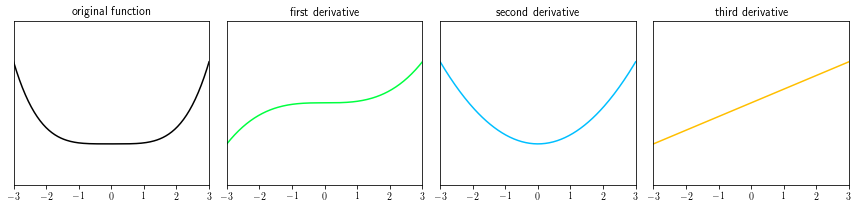

In [2]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**4

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

#### <span style="color:#a50e3e;">Example 2. </span> Higher order derivatives of $g(w)=\text{cos}(3w) + w^2 + w^3$

Using the derivative formulae and rules from the previous Section as well as the compact higher order derivative notation introduced in the previous example, we can write out the first three derivatives explicitly as 


\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = -3\text{sin}(3w) + 2w + 3w^2\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = -9\text{cos}(3w) + 2 + 6w\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 27\text{sin}(3w) + 6\\
\end{array}


We plot these derivatives - along with the original function - in the next Python cell.

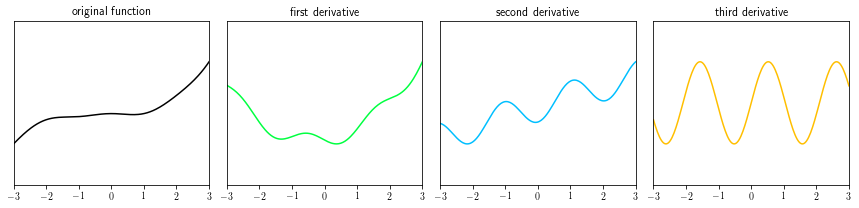

In [3]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.cos(3*w) + w**2 + w**3

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

---

### Notation for higher order derivatives

Higher order derivatives are also often expressed using more compact notation than given above.  For example, the second derivative is very often denoted more compactly using the following notation

\begin{equation}
\frac{\mathrm{d^2}}{\mathrm{d}w^2}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)
\end{equation}

Likewise the third derivative is often denoted more compactly as 

\begin{equation}
\frac{\mathrm{d^3}}{\mathrm{d}w^3}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right)
\end{equation}

and in general the $n^{th}$ order derivative is written as

\begin{equation}
\frac{\mathrm{d^n}}{\mathrm{d}w^n}g(w) 
\end{equation}

## 15.7.2  Higher order derivatives of multi-input functions

We have seen how the gradient of a multi-input function is a collection of partial derivatives 

\begin{equation}
\nabla g(w_1, w_2, \ldots, w_N) = 
\begin{bmatrix}
\
\frac{\partial}{\partial w_1}g(w_1, w_2, \ldots, w_N) \\
\frac{\partial}{\partial w_2}g(w_1, w_2, \ldots, w_N) \\
\vdots \\
\frac{\partial}{\partial w_N}g(w_1, w_2, \ldots, w_N) 
\end{bmatrix}
\end{equation}

where the gradient contains the $n^{th}$ partial derivative $\frac{\partial}{\partial w_n}g(w_1, w_2, \ldots, w_N)$ as its $n^{th}$ entry.  This partial derivative - like the original function itself - is a function taking in the $N$ inputs abbreviated $\mathbf{w}$.  Because of this we can differentiate the $n^{th}$ partial derivative along each input axis. For instance, we can take the $m^{th}$ partial derivative of  $\frac{\partial}{\partial w_n}g(w_1,w_2,..,w_N)$ as

\begin{equation}
\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g(w_1, w_2, \ldots, w_N)
\end{equation}

This is a *second order derivative*.  How many of these does a function $g(\mathbf{w})$ taking in $N$ inputs have?  Well every one of $g$'s $N$ first order derivatives - each being a function of $N$ inputs - has $N$ partial derivatives.  This means that $g(\mathbf{w})$ has a total of $N^2$ second order derivatives.

As with the notion of the gradient, this large set of second order derivatives are typically organized in a very particular way so that they can be more easily communicated and computed with.  The *Hessian* - which is written notationally as $\nabla^2 g(\mathbf{w})$ - is the $N\times N$ matrix of second order derivatives whose $(m,n)^{th}$ element is $\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g(\mathbf{w})$ or $\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g$ for short.  The full Hessian matrix is written as

\begin{equation}
\nabla^2 g(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_N}g\\
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_N}g\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial}{\partial w_N} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_N} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_N} \frac{\partial}{\partial w_N}g\\
\end{bmatrix}
\end{equation}

Moreover since it is virtually always the case that
$\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g = \frac{\partial}{\partial w_n} \frac{\partial}{\partial w_m}g$, particularly with the sort of functions used in machine learning, *the Hessian is a symmetric matrix*.

In general the number of partial derivatives of a multi-input function grows *exponentially* with the order.  We have just seen that a function taking in $N$ inputs has $N^2$ second order derivatives.  In general such a function has $N^D$ partial derivatives of order $D$ (note this accounts for the case of first order derivatives, when $D=1$, as well).  

#### <span style="color:#a50e3e;">Example 3. </span>  The Hessian of $g(w_1,w_2) = w^2_1 + w^2_2$

In the Python cell below we plot the function $g(w_1,w_2) = w^2_1 + w^2_2$, along with its first and second derivatives in a binary tree whose structure reflects the fact that the number of derivatives grows exponentially with order.  Notice that the second order derivatives $ \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g(w_1,w_2)$ and  $ \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g(w_1,w_2)$ have been plotted in the same panel, since they are the same function.

<IPython.core.display.Javascript object>


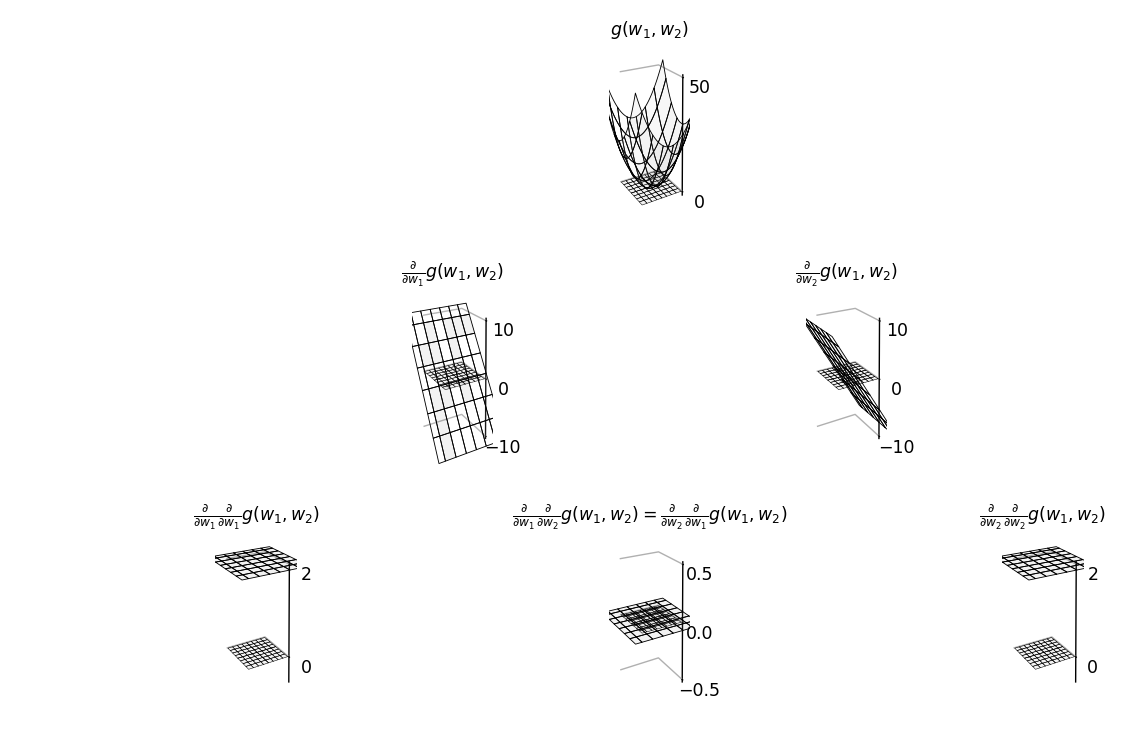

In [7]:
# define the function and viewing angle
func = lambda w: w[0]**2 + w[1]**2
view = [10,150]

# visualize function, first and second derivatives: note the renderer associated with %matplotlib notebook does not work well with this widget (tends to enlarge and center 3d images), use %config InlineBackend.figure_format = 'retina'
callib.derivative_tree.draw_it(func = func,view = view)

One can verify that these derivatives take the algebraic form

\begin{equation}
\nabla g(w_1,w_2) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1}g(w_1,w_2) \\
\frac{\partial}{\partial w_2}g(w_1,w_2) \\
\end{bmatrix}
= 
\begin{bmatrix}
2w_1 \\
2w_2 \\
\end{bmatrix}
\end{equation}

and 

\begin{equation}
\nabla^2 g(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g\\
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g&
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_2}g 
\end{bmatrix}
 = 
 \begin{bmatrix}
 2 \,\,\, 0 \\
 0 \,\,\, 2 
 \end{bmatrix}
\end{equation}